<a href="https://colab.research.google.com/github/martinfinis/HelloCodeSchoolProject/blob/master/covid_19_V1_2_P_New_Base_Martin_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading data

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import time

In [9]:
# mount google drive to access dataset food
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [10]:
%cd /content/

!unzip '/content/drive/.shortcut-targets-by-id/1lp7vo6EG60jba1Gk_tuNpvDm7q5ZXlKX/Telecom_Specialization_ML3/Students/Peter_Christoph_Marko_Martin/data/archive.zip'

/content
Archive:  /content/drive/.shortcut-targets-by-id/1lp7vo6EG60jba1Gk_tuNpvDm7q5ZXlKX/Telecom_Specialization_ML3/Students/Peter_Christoph_Marko_Martin/data/archive.zip
replace curated_data/curated_data/1NonCOVID/16_Morozov_study_0001_12.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [11]:
##### Inconsistency between file names and file names in meta data #####
## ==> rename files to the names used in meta_data_covid.csv
!mv "/content/curated_data/curated_data/2COVID/17_Zhao_Recurrence-of-positive-SARS-CoV-2-RNA-in-C_2020_International-Journal-of-Inf-p1-21%0.png" "/content/curated_data/curated_data/2COVID/17_Zhao_Recurrence-of-COVID-19-SARS-CoV-2-RNA-in-C_2020_International-Journal-of-Inf-p1-21%0.png"

!mv "/content/curated_data/curated_data/2COVID/17_Zhao_Recurrence-of-positive-SARS-CoV-2-RNA-in-C_2020_International-Journal-of-Inf-p1-21%1.png" "/content/curated_data/curated_data/2COVID/17_Zhao_Recurrence-of-COVID-19-SARS-CoV-2-RNA-in-C_2020_International-Journal-of-Inf-p1-21%1.png"

In [12]:
#17_Zhao_Recurrence-of-COVID-19-SARS-CoV-2-RNA-in-C_2020_International-Journal-of-Inf-p1-21%0

In [13]:
# Load data as dataframes
df_meta_cap = pd.read_csv('meta_data_cap.csv')
df_meta_covid = pd.read_csv('meta_data_covid.csv', encoding = "ISO-8859-1")
df_meta_normal = pd.read_csv('meta_data_normal.csv')

# Data analysis

### Analysis of df_meta_cap

In [14]:
# Get some information about df_meta_cap
print(df_meta_cap.info())
display(df_meta_cap.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2618 entries, 0 to 2617
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   index                        2618 non-null   int64  
 1   File name                    2618 non-null   object 
 2   Patient ID                   2618 non-null   object 
 3   Slices_x                     2618 non-null   int64  
 4   Columns                      2618 non-null   int64  
 5   Date of Last Calibration     2618 non-null   int64  
 6   Diagnosis                    2618 non-null   object 
 7   Distance Source to Detector  2618 non-null   int64  
 8   Distance Source to Patient   2618 non-null   int64  
 9   Exposure Time                2618 non-null   int64  
 10  KVP                          2618 non-null   int64  
 11  Age                          2618 non-null   int64  
 12  Gender                       2618 non-null   object 
 13  Rows              

,index,File name,Patient ID,Slices_x,Columns,Date of Last Calibration,Diagnosis,Distance Source to Detector,Distance Source to Patient,Exposure Time,KVP,Age,Gender,Rows,Slice Thickness,Slices_y,Study Date,XRayTubeCurrent,Last Calibration,mAs,Country
0,0,cap006_10.png,cap006,10,512,20180921,CAP,940,535,600,110,71,M,512,2,172,20180922,254,1 days 00:00:00.000000000,152.4,Iran
1,1,cap006_11.png,cap006,11,512,20180921,CAP,940,535,600,110,71,M,512,2,172,20180922,254,1 days 00:00:00.000000000,152.4,Iran
2,2,cap006_12.png,cap006,12,512,20180921,CAP,940,535,600,110,71,M,512,2,172,20180922,254,1 days 00:00:00.000000000,152.4,Iran
3,3,cap006_14.png,cap006,14,512,20180921,CAP,940,535,600,110,71,M,512,2,172,20180922,254,1 days 00:00:00.000000000,152.4,Iran
4,4,cap006_15.png,cap006,15,512,20180921,CAP,940,535,600,110,71,M,512,2,172,20180922,254,1 days 00:00:00.000000000,152.4,Iran


In [15]:
df_meta_cap.loc[df_meta_cap.duplicated(),:]  # get duplicates

,index,File name,Patient ID,Slices_x,Columns,Date of Last Calibration,Diagnosis,Distance Source to Detector,Distance Source to Patient,Exposure Time,KVP,Age,Gender,Rows,Slice Thickness,Slices_y,Study Date,XRayTubeCurrent,Last Calibration,mAs,Country


In [16]:
df_meta_cap['Country'].unique()     # unique countries

array(['Iran'], dtype=object)

In [17]:
df_meta_cap['Patient ID'].nunique() # number of unique patients

54

In [18]:
df_meta_cap['Age'].unique()         # unique ages

array([71, 54, 38, 68, 84, 65, 94, 44, 29, 87, 13, 59, 40, 52, 34, 22, 32,
       25, 80, 46, 70, 21, 51, 30, 26, 76, 56, 62, 77, 75, 39, 83, 48, 73,
       74, 55, 93, 37, 89, 58, 67, 12])

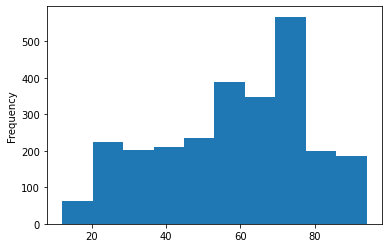

In [19]:
# Display age distribution
df_meta_cap.Age.plot(kind='hist')
plt.show()

### Analysis of df_meta_covid

In [20]:
df_meta_covid.loc[df_meta_covid.duplicated(),:]  # get duplicates

,index,File name,Patient ID,Gender,Age,Country,Diagnosis,Slice,Case Discussion,Case Number,Columns,Date,Date of Last Calibration,Distance Source to Detector,Distance Source to Patient,Exposure Time,Image Source,Institution,KVP,Last Calibration,Link,Link2,Other diseases,Presentation,RT_PCR_COVID-19,Rows,Severity,Slice Thickness,Slices,Source_detail,Time,XRayTubeCurrent,category,doi,finding,in_icu,intubated,intubation_present,license,mAs,mask_file,needed_supplemental_O2,study_file,survival,went_icu


In [21]:
# Get some information about df_meta_covid
print(df_meta_covid.info())
display(df_meta_covid.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7593 entries, 0 to 7592
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   index                        7593 non-null   int64  
 1   File name                    7593 non-null   object 
 2   Patient ID                   7593 non-null   object 
 3   Gender                       7593 non-null   object 
 4   Age                          7593 non-null   object 
 5   Country                      7593 non-null   object 
 6   Diagnosis                    7593 non-null   object 
 7   Slice                        7210 non-null   float64
 8   Case Discussion              493 non-null    object 
 9   Case Number                  1944 non-null   object 
 10  Columns                      3815 non-null   float64
 11  Date                         4491 non-null   object 
 12  Date of Last Calibration     3815 non-null   float64
 13  Distance Source to

,index,File name,Patient ID,Gender,Age,Country,Diagnosis,Slice,Case Discussion,Case Number,Columns,Date,Date of Last Calibration,Distance Source to Detector,Distance Source to Patient,Exposure Time,Image Source,Institution,KVP,Last Calibration,Link,Link2,Other diseases,Presentation,RT_PCR_COVID-19,Rows,Severity,Slice Thickness,Slices,Source_detail,Time,XRayTubeCurrent,category,doi,finding,in_icu,intubated,intubation_present,license,mAs,mask_file,needed_supplemental_O2,study_file,survival,went_icu
0,0,6_Rahimzadeh_137covid_patient101_SR_4_IM00006.png,patient101,F,51,Iran,COVID-19,6.0,NaN,NaN,NaN,20200328,NaN,NaN,NaN,NaN,NaN,Negin radiology located at Sari,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,6_Rahimzadeh_137covid_patient101_SR_4_IM00008.png,patient101,F,51,Iran,COVID-19,8.0,NaN,NaN,NaN,20200328,NaN,NaN,NaN,NaN,NaN,Negin radiology located at Sari,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,6_Rahimzadeh_137covid_patient101_SR_4_IM00009.png,patient101,F,51,Iran,COVID-19,9.0,NaN,NaN,NaN,20200328,NaN,NaN,NaN,NaN,NaN,Negin radiology located at Sari,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,6_Rahimzadeh_137covid_patient101_SR_4_IM00010.png,patient101,F,51,Iran,COVID-19,10.0,NaN,NaN,NaN,20200328,NaN,NaN,NaN,NaN,NaN,Negin radiology located at Sari,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,6_Rahimzadeh_137covid_patient101_SR_4_IM00011.png,patient101,F,51,Iran,COVID-19,11.0,NaN,NaN,NaN,20200328,NaN,NaN,NaN,NaN,NaN,Negin radiology located at Sari,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df_meta_covid['Country'].unique()     # unique countries

array(['Iran', 'Italy', 'China', '-', 'Turkey', 'Ukraine', 'Belgium',
       'South Korea', 'Taiwan', 'Spain', 'Portugal', 'Greece', 'Russia',
       'Japan'], dtype=object)

In [23]:
df_meta_covid['Patient ID'].nunique() # number of unique patients

464

### Analysis of df_meta_normal

# import cvs data and merge

In [24]:
import pandas as pd
df_cap = pd.read_csv('/content/meta_data_cap.csv',delimiter=',', index_col=0)
df_cap = df_cap.reset_index(drop=True)
df_cap.head(3)

,File name,Patient ID,Slices_x,Columns,Date of Last Calibration,Diagnosis,Distance Source to Detector,Distance Source to Patient,Exposure Time,KVP,Age,Gender,Rows,Slice Thickness,Slices_y,Study Date,XRayTubeCurrent,Last Calibration,mAs,Country
0,cap006_10.png,cap006,10,512,20180921,CAP,940,535,600,110,71,M,512,2,172,20180922,254,1 days 00:00:00.000000000,152.4,Iran
1,cap006_11.png,cap006,11,512,20180921,CAP,940,535,600,110,71,M,512,2,172,20180922,254,1 days 00:00:00.000000000,152.4,Iran
2,cap006_12.png,cap006,12,512,20180921,CAP,940,535,600,110,71,M,512,2,172,20180922,254,1 days 00:00:00.000000000,152.4,Iran


In [25]:
df_cap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2618 entries, 0 to 2617
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   File name                    2618 non-null   object 
 1   Patient ID                   2618 non-null   object 
 2   Slices_x                     2618 non-null   int64  
 3   Columns                      2618 non-null   int64  
 4   Date of Last Calibration     2618 non-null   int64  
 5   Diagnosis                    2618 non-null   object 
 6   Distance Source to Detector  2618 non-null   int64  
 7   Distance Source to Patient   2618 non-null   int64  
 8   Exposure Time                2618 non-null   int64  
 9   KVP                          2618 non-null   int64  
 10  Age                          2618 non-null   int64  
 11  Gender                       2618 non-null   object 
 12  Rows                         2618 non-null   int64  
 13  Slice Thickness   

In [26]:
import pandas as pd
df_normal = pd.read_csv('/content/meta_data_normal.csv',delimiter=',',encoding='utf-8', index_col=0)
df_normal = df_normal.reset_index(drop=True)
#44 colums 21 one with NaN

In [27]:
df_normal = df_normal.dropna(axis=1, how='all')
df_normal.head(3)

,File name,Patient ID,Gender,Age,Country,Diagnosis,Slice,Columns,Date,Date of Last Calibration,Distance Source to Detector,Distance Source to Patient,Exposure Time,Institution,KVP,Last Calibration,Rows,Slice Thickness,Slices,XRayTubeCurrent,category,mAs,study_file
0,6_Rahimzadeh_normal10_patient151_SR_4_IM00012.png,patient151,F,43,Iran,Normal,12,NaN,20200321.0,NaN,NaN,NaN,NaN,Negin radiology located at Sari,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6_Rahimzadeh_normal10_patient151_SR_4_IM00017.png,patient151,F,43,Iran,Normal,17,NaN,20200321.0,NaN,NaN,NaN,NaN,Negin radiology located at Sari,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6_Rahimzadeh_normal10_patient151_SR_4_IM00022.png,patient151,F,43,Iran,Normal,22,NaN,20200321.0,NaN,NaN,NaN,NaN,Negin radiology located at Sari,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df_normal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6893 entries, 0 to 6892
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   File name                    6893 non-null   object 
 1   Patient ID                   6893 non-null   object 
 2   Gender                       6893 non-null   object 
 3   Age                          6893 non-null   int64  
 4   Country                      6893 non-null   object 
 5   Diagnosis                    6893 non-null   object 
 6   Slice                        6893 non-null   int64  
 7   Columns                      760 non-null    float64
 8   Date                         1813 non-null   float64
 9   Date of Last Calibration     760 non-null    float64
 10  Distance Source to Detector  760 non-null    float64
 11  Distance Source to Patient   760 non-null    float64
 12  Exposure Time                760 non-null    float64
 13  Institution       

In [163]:
import pandas as pd
df_covid = pd.read_csv('/content/meta_data_covid.csv',delimiter=',',encoding='latin-1', index_col=0)
df_covid = df_covid.reset_index(drop=True)
df_covid.head(3)

,File name,Patient ID,Gender,Age,Country,Diagnosis,Slice,Case Discussion,Case Number,Columns,Date,Date of Last Calibration,Distance Source to Detector,Distance Source to Patient,Exposure Time,Image Source,Institution,KVP,Last Calibration,Link,Link2,Other diseases,Presentation,RT_PCR_COVID-19,Rows,Severity,Slice Thickness,Slices,Source_detail,Time,XRayTubeCurrent,category,doi,finding,in_icu,intubated,intubation_present,license,mAs,mask_file,needed_supplemental_O2,study_file,survival,went_icu
0,6_Rahimzadeh_137covid_patient101_SR_4_IM00006.png,patient101,F,51,Iran,COVID-19,6.0,NaN,NaN,NaN,20200328,NaN,NaN,NaN,NaN,NaN,Negin radiology located at Sari,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6_Rahimzadeh_137covid_patient101_SR_4_IM00008.png,patient101,F,51,Iran,COVID-19,8.0,NaN,NaN,NaN,20200328,NaN,NaN,NaN,NaN,NaN,Negin radiology located at Sari,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6_Rahimzadeh_137covid_patient101_SR_4_IM00009.png,patient101,F,51,Iran,COVID-19,9.0,NaN,NaN,NaN,20200328,NaN,NaN,NaN,NaN,NaN,Negin radiology located at Sari,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [164]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7593 entries, 0 to 7592
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   File name                    7593 non-null   object 
 1   Patient ID                   7593 non-null   object 
 2   Gender                       7593 non-null   object 
 3   Age                          7593 non-null   object 
 4   Country                      7593 non-null   object 
 5   Diagnosis                    7593 non-null   object 
 6   Slice                        7210 non-null   float64
 7   Case Discussion              493 non-null    object 
 8   Case Number                  1944 non-null   object 
 9   Columns                      3815 non-null   float64
 10  Date                         4491 non-null   object 
 11  Date of Last Calibration     3815 non-null   float64
 12  Distance Source to Detector  3815 non-null   float64
 13  Distance Source to

In [165]:
df_covid['Age'].unique()

array(['51', '41', '33', '54', '48', '57', '56', '28', '49', '31', '36',
       '69', '40', '75', '53', '50', '39', '82', '78', '45', '46', '42',
       '66', '34', '76', '17', '61', '55', '52', '60', '62', '65', '70',
       '63', '77', '68', '38', '20', '58', '87', '84', '72', '0', '73',
       '47', '64', '80', '32', '27', '71', '79', '67', '43', '86', '-',
       '25', '35', '83', '59', '22', '90', '23', '95', '88', '19', '44',
       '89', '85', '91', '24', '93', '96', '74', '37', '26', '94', '92',
       '21', '18', '30', '81', '29', '12', '1', '15'], dtype=object)

In [167]:
df_covid['Age'] = df_covid['Age'].apply(lambda x: 4711 if x == '-' else x)

In [168]:
df_covid['Age'].unique()

array(['51', '41', '33', '54', '48', '57', '56', '28', '49', '31', '36',
       '69', '40', '75', '53', '50', '39', '82', '78', '45', '46', '42',
       '66', '34', '76', '17', '61', '55', '52', '60', '62', '65', '70',
       '63', '77', '68', '38', '20', '58', '87', '84', '72', '0', '73',
       '47', '64', '80', '32', '27', '71', '79', '67', '43', '86', 4711,
       '25', '35', '83', '59', '22', '90', '23', '95', '88', '19', '44',
       '89', '85', '91', '24', '93', '96', '74', '37', '26', '94', '92',
       '21', '18', '30', '81', '29', '12', '1', '15'], dtype=object)

In [169]:
df_covid['Age'] = df_covid['Age'].astype(int)

In [ ]:
merge reports

#merge reports for statistic

In [170]:
covid_name = df_covid.columns.tolist()
covid_name.sort()
print(covid_name)

['Age', 'Case Discussion', 'Case Number', 'Columns', 'Country', 'Date', 'Date of Last Calibration', 'Diagnosis', 'Distance Source to Detector', 'Distance Source to Patient', 'Exposure Time', 'File name', 'Gender', 'Image Source', 'Institution', 'KVP', 'Last Calibration', 'Link', 'Link2', 'Other diseases', 'Patient ID', 'Presentation', 'RT_PCR_COVID-19', 'Rows', 'Severity', 'Slice', 'Slice Thickness', 'Slices', 'Source_detail', 'Time', 'XRayTubeCurrent', 'category', 'doi', 'finding', 'in_icu', 'intubated', 'intubation_present', 'license', 'mAs', 'mask_file', 'needed_supplemental_O2', 'study_file', 'survival', 'went_icu']


In [171]:
normal_name = df_normal.columns.tolist()
normal_name.sort()
print(normal_name)

['Age', 'Columns', 'Country', 'Date', 'Date of Last Calibration', 'Diagnosis', 'Distance Source to Detector', 'Distance Source to Patient', 'Exposure Time', 'File name', 'Gender', 'Institution', 'KVP', 'Last Calibration', 'Patient ID', 'Rows', 'Slice', 'Slice Thickness', 'Slices', 'XRayTubeCurrent', 'category', 'mAs', 'study_file']


In [172]:
cap_name = df_cap.columns.tolist()
cap_name.sort()
print(cap_name)

['Age', 'Columns', 'Country', 'Date of Last Calibration', 'Diagnosis', 'Distance Source to Detector', 'Distance Source to Patient', 'Exposure Time', 'File name', 'Gender', 'KVP', 'Last Calibration', 'Patient ID', 'Rows', 'Slice Thickness', 'Slices_x', 'Slices_y', 'Study Date', 'XRayTubeCurrent', 'mAs']


In [173]:
importend_colums = ['Patient ID','Diagnosis','Gender','Age','Country','File name']

In [174]:
set(importend_colums).issubset(cap_name)

True

In [144]:
set(importend_colums).issubset(normal_name)

True

In [145]:
set(importend_colums).issubset(covid_name)

True

In [175]:
df_all = df_cap[importend_colums]

In [176]:
df_all.head(3)

,Patient ID,Diagnosis,Gender,Age,Country,File name
0,cap006,CAP,M,71,Iran,cap006_10.png
1,cap006,CAP,M,71,Iran,cap006_11.png
2,cap006,CAP,M,71,Iran,cap006_12.png


In [177]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2618 entries, 0 to 2617
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Patient ID  2618 non-null   object
 1   Diagnosis   2618 non-null   object
 2   Gender      2618 non-null   object
 3   Age         2618 non-null   int64 
 4   Country     2618 non-null   object
 5   File name   2618 non-null   object
dtypes: int64(1), object(5)
memory usage: 122.8+ KB


In [178]:
df_all = pd.concat([df_all, df_covid[importend_colums]], ignore_index=True)

In [179]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10211 entries, 0 to 10210
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Patient ID  10211 non-null  object
 1   Diagnosis   10211 non-null  object
 2   Gender      10211 non-null  object
 3   Age         10211 non-null  int64 
 4   Country     10211 non-null  object
 5   File name   10211 non-null  object
dtypes: int64(1), object(5)
memory usage: 478.8+ KB


In [180]:
df_all['Diagnosis'].unique()

array(['CAP', 'COVID-19'], dtype=object)

In [181]:
df_all = pd.concat([df_all, df_normal[importend_colums]], ignore_index=True)

In [182]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17104 entries, 0 to 17103
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Patient ID  17104 non-null  object
 1   Diagnosis   17104 non-null  object
 2   Gender      17104 non-null  object
 3   Age         17104 non-null  int64 
 4   Country     17104 non-null  object
 5   File name   17104 non-null  object
dtypes: int64(1), object(5)
memory usage: 801.9+ KB


In [183]:
#90 -> between 61 - 90
age_group_lst =[10,20,30,40,50,60,70,80,90,120,4711]
age_group_name =['1-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','>91','unk']
def age_group(x):
  for i,age in zip(range(len(age_group_lst)),age_group_lst):
    if x <= age:
      return age_group_name[i]

#result 60 -> between 31 - 60
#result 90 -> between 61 - 90
age_group(31)

'31-40'

In [184]:
df_all['age_group'] = df_all['Age'].apply(age_group)

In [192]:
len(df_all['Patient ID'].unique())

1122

In [195]:
df_all = df_all.groupby('Patient ID', as_index=False).last()

In [196]:
df_all

,Patient ID,Diagnosis,Gender,Age,Country,File name,age_group
0,17,COVID-19,M,54,South Korea,15_Cohen_jkms-35-e79-g001-l-e.png,51-60
1,19,COVID-19,F,55,Taiwan,15_Cohen_1-s2.0-S0929664620300449-gr3_lrg-d.png,51-60
2,207,COVID-19,M,62,Spain,15_Cohen_16751_2_2.png,61-70
3,208,COVID-19,F,83,Portugal,15_Cohen_16689_1_2.png,81-90
4,209,COVID-19,F,59,Portugal,15_Cohen_16689_2_2.png,51-60
...,...,...,...,...,...,...,...
1117,study_id_96,Normal,M,69,Russia,16_Morozov_study_0096_31.png,61-70
1118,study_id_97,Normal,M,57,Russia,16_Morozov_study_0097_29.png,51-60
1119,study_id_98,Normal,M,31,Russia,16_Morozov_study_0098_32.png,31-40
1120,study_id_99,Normal,M,56,Russia,16_Morozov_study_0099_30.png,51-60


In [ ]:
#pandas plot grouped bar chart
#https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html


# groupby https://colab.research.google.com/drive/1o6_07WixYfAmMQG1VuKuLib-S9eYVod9#scrollTo=ZY9zgsxCM94y



In [205]:
df_test_2 = df_all.groupby(['Diagnosis','age_group']).agg(count_per_age_group=('age_group','count'))

In [206]:
df_test_2

count_per_age_group
Diagnosis age_group                     
CAP       11-20                        2
          21-30                        8
          31-40                        6
          41-50                        3
          51-60                       11
          61-70                        6
          71-80                       12
          81-90                        4
          >91                          2
COVID-19  1-10                         7
          11-20                        6
          21-30                       20
          31-40                       56
          41-50                       66
          51-60                       45
          61-70                       54
          71-80                       36
          81-90                        8
          >91                         12
          unk                        154
Normal    1-10                         1
          11-20                       20
          21-30                       94
          31-40                      159
          41-50                      114
          51-60                       77
          61-70                       45
          71-80                       41
          81-90                       41
          >91                         12

In [207]:
df_for_plot = df_test_2.reset_index()

In [208]:
df_for_plot.head()

,Diagnosis,age_group,count_per_age_group
0,CAP,11-20,2
1,CAP,21-30,8
2,CAP,31-40,6
3,CAP,41-50,3
4,CAP,51-60,11


In [ ]:
# interat and use a plain old function 

In [210]:
labels = ['1-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','>91','unk']

In [213]:
labels.index('11-20')

1

In [211]:
[0] * len(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [215]:
labels = ['1-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','>91','unk']
covid_n = [0] * len(labels)
cap_n = [0] * len(labels)
normal_n = [0] * len(labels)

for _, row in df_for_plot.iterrows():
  i = labels.index(row['age_group'])
  if row['Diagnosis'] == 'CAP':
    cap_n[i] =  row['count_per_age_group']
  elif row['Diagnosis'] == 'COVID-19':  
    covid_n[i] =  row['count_per_age_group']
  elif row['Diagnosis'] == 'Normal':
    normal_n[i] =  row['count_per_age_group']  
  else:
    print("should nerver happen")

covid_n,cap_n,normal_n

([7, 6, 20, 56, 66, 45, 54, 36, 8, 12, 154],
 [0, 2, 8, 6, 3, 11, 6, 12, 4, 2, 0],
 [1, 20, 94, 159, 114, 77, 45, 41, 41, 12, 0])

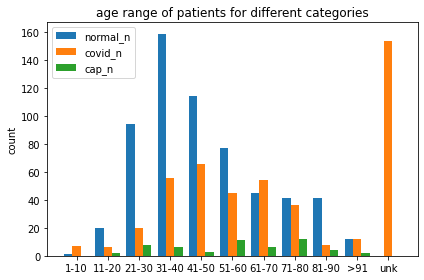

In [232]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#plt.figure(figsize=(20,10))
#from matplotlib.pyplot import figure
#figure(figsize=(18,12), dpi=180)

x = np.arange(len(labels))  # the label locations
width = 0.8  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/3, normal_n, width/3, label='normal_n')
rects2 = ax.bar(x  , covid_n, width/3, label='covid_n')
rects2 = ax.bar(x + (width/3), cap_n, width/3, label='cap_n')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('count')
ax.set_title('age range of patients for different categories')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [ ]:
#df_test_2.rest_index()

In [ ]:
#df_for_plot = df_all.groupby(['Patient ID','Diagnosis','age_group']).agg(count_per_age_group=('age_group','count'))
#df_for_plot = df_for_plot.reset_index()
#df_for_plot

In [187]:
df_for_plot['Diagnosis'].unique()

array(['COVID-19', 'Normal', 'CAP'], dtype=object)

In [188]:
df_for_plot['age_group'].unique()

array(['51-60', '61-70', '81-90', '21-30', '31-40', '41-50', 'unk',
       '71-80', '11-20', '1-10', '>91'], dtype=object)

##Visualize the age range of patients for different categories

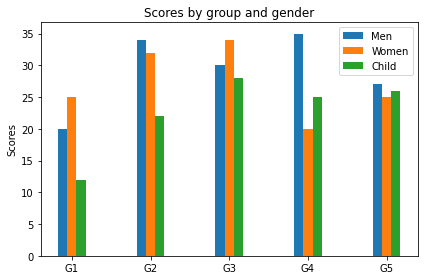

In [91]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


#labels = ['G1', 'G2', 'G3', 'G4', 'G5']
#age_group_name =['1-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','>91','unk']
labels = ['1-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','>91','unk']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]
childs_means = [12, 22, 28, 25, 26]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/3, men_means, width/3, label='Men')
rects2 = ax.bar(x  , women_means, width/3, label='Women')
rects2 = ax.bar(x + (width/3), childs_means, width/3, label='Child')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [80]:
import seaborn as sns

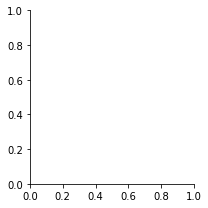

In [83]:
g = sns.FacetGrid(df_all, hue="Diagnosis")
g.map(sns.histplot)#, "mpg")

# create pandas_profiling report

In [ ]:
import pandas_profiling as pp

In [ ]:
#pp.ProfileReport(df_cap, title="cap")

In [ ]:
#pp.ProfileReport(df_normal, title="normal")

In [ ]:
#pp.ProfileReport(df_covid, title="covid")